Dataset preview:
   daily_usage_hours  site_categories_visited  sessions_per_day
0           9.884957                        2                13
1           1.023220                        9                 1
2          10.394205                        9                 3
3           5.990237                        6                16
4           3.558451                        4                 4

Clustered Data:
    daily_usage_hours  site_categories_visited  sessions_per_day  Cluster
0            9.884957                        2                13        0
1            1.023220                        9                 1        1
2           10.394205                        9                 3        1
3            5.990237                        6                16        1
4            3.558451                        4                 4        0
..                ...                      ...               ...      ...
95           3.051110                        4                18

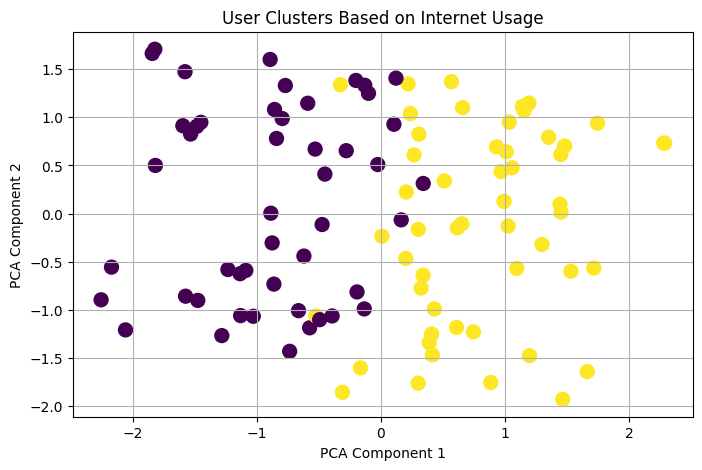

In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset with correct headers
# dataset_path = '/mnt/data/internet_usage.csv'  # Replace with your actual file path
data = pd.read_csv('/content/internet_usage.csv')

# Print dataset to confirm
print("Dataset preview:")
print(data.head())

# Select relevant features
features = data[['daily_usage_hours', 'site_categories_visited', 'sessions_per_day']]

# Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0)  # You can change n_clusters as needed
clusters = kmeans.fit_predict(features_scaled)

# Add cluster info to the dataset
data['Cluster'] = clusters

# Show result
print("\nClustered Data:")
print(data)

# Visualize using PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(features_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(reduced[:, 0], reduced[:, 1], c=clusters, cmap='viridis', s=100)
plt.title('User Clusters Based on Internet Usage')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()
